Some of the code in this lab was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution

# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

You will be able to:
* Use Lasso and ridge regression in Python
* Compare Lasso and Ridge with standard regression
* Find optimal values of alpha for Lasso and Ridge

## Housing Prices Data

Let's look at yet another house pricing data set.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at df.info

In [2]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

First, make a selection of the data by removing some of the data with `dtype = object`, this way our first model only contains **continuous features**

Make sure to remove the SalesPrice column from the predictors (which you store in `X`).

Store the target in `y`.

In [3]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution

#create X and y then train test split
features = [col for col in df.columns if col != 'SalePrice']
X = df.loc[:, features]
y = df.loc[:, 'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# remove object type features
cont_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]
X_train_cont = X_train.loc[:, cont_features]
X_test_cont = X_test.loc[:, cont_features]

In [4]:
len(X_train_cont), len(X_test_cont)

(1095, 365)

## Let's use this data to perform a first naive linear regression model

Compute the R squared and the MSE for both train and test set.

In [5]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer

# impute data
impute = Imputer(strategy='median')
impute.fit(X_train_cont)
X_train_imputed = impute.transform(X_train_cont)
X_test_imputed = impute.transform(X_test_cont)

# create model and print stats
reg = LinearRegression()
reg.fit(X_train_imputed, y_train)

print('Training r2: ', reg.score(X_train_imputed, y_train))
print('Testing r2: ', reg.score(X_test_imputed, y_test))
print('Training MSE: ', mean_squared_error(y_train, reg.predict(X_train_imputed)))
print('Testing MSE: ', mean_squared_error(y_test, reg.predict(X_test_imputed)))

Training r2:  0.8069714678400265
Testing r2:  0.8203264293698926
Training MSE:  1212415985.7084064
Testing MSE:  1146350639.8805728


## Normalize your data

We haven't normalized our data, let's create a new model that uses `StandardScalar` to scale our predictors!

In [8]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_imputed)
X_train_imputed_scaled = ss.transform(X_train_imputed)
X_test_imputed_scaled = ss.transform(X_test_imputed)

Perform the same linear regression on this data and print out R-squared and MSE.

In [9]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution

reg = LinearRegression()
reg.fit(X_train_imputed_scaled, y_train)

print('Training r2: ', reg.score(X_train_imputed_scaled, y_train))
print('Testing r2: ', reg.score(X_test_imputed_scaled, y_test))
print('Training MSE: ', mean_squared_error(y_train, reg.predict(X_train_imputed_scaled)))
print('Testing MSE: ', mean_squared_error(y_test, reg.predict(X_test_imputed_scaled)))

Training r2:  0.8070159754195584
Testing r2:  0.8202405055692075
Training MSE:  1212136432.7308965
Testing MSE:  1146898849.6342442


## Include categorical variables

Your model hasn't included categorical variables so far: let's use the "object" variables again

In [11]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution


# Create X_cat which contains only the categorical variables
features_cat = [col for col in X.columns if X[col].dtype in [np.object]]
X_train_cat = X_train.loc[:, features_cat]
X_test_cat = X_test.loc[:, features_cat]

#Fill missing values with a string indicating that that it is missing
X_train_cat.fillna(value='missing', inplace=True)
X_test_cat.fillna(value='missing', inplace=True)

In [14]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution

from sklearn.preprocessing import OneHotEncoder
# OneHotEncode Categorical variables

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_ohe = ohe.transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

Merge `x_cat` together with our scaled `X` so you have one big predictor dataframe.

In [15]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1) 
X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)

Perform the same linear regression on this data and print out R-squared and MSE.

In [20]:
len(X_train_all), len(y_train)

(1095, 1095)

In [22]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
reg_all = LinearRegression()
reg_all.fit(X_train_all, y_train)

print('Training r2: ', reg_all.score(X_train_all, y_train))
print('Testing r2: ', reg_all.score(X_test_all, y_test))
print('Training MSE: ', mean_squared_error(y_train, reg_all.predict(X_train_all)))
print('Testing MSE: ', mean_squared_error(y_test, reg_all.predict(X_test_all)))

Training r2:  0.9360007807588508
Testing r2:  -9.0338451960491e+18
Training MSE:  401980347.7369863
Testing MSE:  5.7637604600137055e+28


Notice the severe overfitting above; our training R squared is quite high, but the testing R squared is negative! Our predictions are far off. Similarly, the scale of the Testing MSE is orders of magnitude higher than that of the training.

## Perform Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables) and perform Lasso and Ridge regression for both! Each time, look at R-squared and MSE.

## Lasso

With default parameter (alpha = 1)

In [24]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=1)
lasso.fit(X_train_all, y_train)

print('Training r2: ', lasso.score(X_train_all, y_train))
print('Testing r2: ', lasso.score(X_test_all, y_test))
print('Training MSE: ', mean_squared_error(y_train, lasso.predict(X_train_all)))
print('Testing MSE: ', mean_squared_error(y_test, lasso.predict(X_test_all)))

Training r2:  0.9359681086176651
Testing r2:  0.888684112594205
Training MSE:  402185562.0947691
Testing MSE:  710215967.2621557


With a higher regularization parameter (alpha = 10)

In [25]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
lasso.fit(X_train_all, y_train)

print('Training r2: ', lasso.score(X_train_all, y_train))
print('Testing r2: ', lasso.score(X_test_all, y_test))
print('Training MSE: ', mean_squared_error(y_train, lasso.predict(X_train_all)))
print('Testing MSE: ', mean_squared_error(y_test, lasso.predict(X_test_all)))

Training r2:  0.9343826511712741
Testing r2:  0.8966777526569274
Training MSE:  412143851.32359594
Testing MSE:  659215063.9643544


## Ridge

With default parameter (alpha = 1)

In [27]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution



ridge = Ridge(alpha=1)
ridge.fit(X_train_all, y_train)

print('Training r2: ', ridge.score(X_train_all, y_train))
print('Testing r2: ', ridge.score(X_test_all, y_test))
print('Training MSE: ', mean_squared_error(y_train, ridge.predict(X_train_all)))
print('Testing MSE: ', mean_squared_error(y_test, ridge.predict(X_test_all)))

Training r2:  0.9231940244796031
Testing r2:  0.884233048544421
Training MSE:  482419834.3987995
Testing MSE:  738614579.8334152


With default parameter (alpha = 10)

In [26]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution



ridge = Ridge(alpha=10)
ridge.fit(X_train_all, y_train)

print('Training r2: ', ridge.score(X_train_all, y_train))
print('Testing r2: ', ridge.score(X_test_all, y_test))
print('Training MSE: ', mean_squared_error(y_train, ridge.predict(X_train_all)))
print('Testing MSE: ', mean_squared_error(y_test, ridge.predict(X_test_all)))

Training r2:  0.8990002650425939
Testing r2:  0.8834542222982166
Training MSE:  634381310.5991352
Testing MSE:  743583635.452231


## Look at the metrics, what are your main conclusions?   

Conclusions here: <br>
Lasso and Ridge regression did much better than normal linear regression. Lasso with an alpha of 10 seemed to be the best.

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Compare with the total length of the parameter space and draw conclusions!

In [29]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
# number of ridge params close to zero
print(sum(abs(ridge.coef_) < 10 ** (-10)))

0


In [30]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution
# number of lasso params close to zero
print(sum(abs(lasso.coef_) < 10 ** (-10)))

77


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

In [32]:
# your code here
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution

sum(abs(lasso.coef_) < 10 ** (-10)) / len(lasso.coef_)

0.26013513513513514

## Summary

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test dataframe with all of our preprocessed features along with training and test targets. 

In [34]:
# code in this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution


def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test dataframes with targets'''
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # remove "object"-type features and SalesPrice from `X`
    cont_cols = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]
    X_train_cont, X_test_cont = X_train.loc[:, cont_cols], X_test.loc[:, cont_cols]
    
    # Impute missing values with median using Imputer from sklearn.preprocessing
    impute = Imputer(strategy='median')
    impute.fit(X_train_cont)
    X_train_imputed = impute.transform(X_train_cont)
    X_test_imputed = impute.transform(X_test_cont)

    # Scale the train and test data
    ss = StandardScaler()
    ss.fit(X_train_imputed)
    X_train_scaled = ss.transform(X_train_imputed)
    X_test_scaled = ss.transform(X_test_imputed)

    # Create X_cat which contains only the categorical variables
    cat_cols = [col for col in X.columns if X[col].dtype in [np.object]]
    X_train_cat = X_train.loc[:, cat_cols]
    X_test_cat = X_test.loc[:, cat_cols]

    
    #Fill nans with a value indicating that that it is missing
    X_train_cat.fillna(value='missing', inplace=True)
    X_test_cat.fillna(value='missing', inplace=True)

    # OneHotEncode Categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train_cat)
    X_train_ohe = ohe.transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)
    
    columns = ohe.get_feature_names(input_features=X_train_cat.columns)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
    
    # combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([pd.DataFrame(X_train_scaled), cat_train_df], axis=1)
    X_test_all = pd.concat([pd.DataFrame(X_test_scaled), cat_test_df], axis=1)
    
    
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the Training and Test Error to Find Optimal Alpha Values

Earlier we tested several values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would 

In [35]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 65


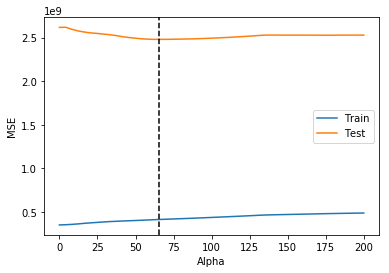

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

#np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# add a vertical line where the testing MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and testing MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Level Up
If you would like more practice doing this kind of analysis try to find the optimal value of alpha for a Ridge regression.